Project Goal:
Analyze the restaurant sales dataset (restaurant_sales_data.csv) to extract insights, perform exploratory data analysis (EDA), and visualize sales-related patterns.

Objectives:
1. Import, clean, and explore the dataset.
2. Perform descriptive statistics (summary, data types, missing values).
3. Explore sales patterns using aggregations (e.g., by category, item, date).
4. Use visualizations (Seaborn/Matplotlib) to identify trends (e.g., sales over time, category distribution).
5. Apply correlations and grouping to understand relationships (e.g., quantity vs total, payment methods).
6. Generate actionable business insights for restaurant decision-making (e.g., popular items, peak periods).

Import libraries & load dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('restaurant_sales_data.csv')  # Replace with your file path if needed

# Display first 5 rows
df.head()

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,ORD_630508,CUST_075,Drinks,NaN,NaN,2.0,5.0,2022-08-09,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash


Data Understanding and Cleaning
- Check shape, info, missing values.
- Handle missing values (e.g., fill or drop).
- Convert 'Order Date' to datetime.
- Verify 'Order Total' = 'Price' * 'Quantity' (fix if inconsistent).
- Handle empty strings or NaN in categorical columns.

In [3]:
# Shape of the dataset
print(f"Dataset shape: {df.shape}")

Dataset shape: (17534, 9)


In [4]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17534 entries, 0 to 17533
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        17534 non-null  object 
 1   Customer ID     17534 non-null  object 
 2   Category        17534 non-null  object 
 3   Item            15776 non-null  object 
 4   Price           16658 non-null  float64
 5   Quantity        17104 non-null  float64
 6   Order Total     17104 non-null  float64
 7   Order Date      17534 non-null  object 
 8   Payment Method  16452 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.2+ MB


In [5]:
# Check missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Order ID             0
Customer ID          0
Category             0
Item              1758
Price              876
Quantity           430
Order Total        430
Order Date           0
Payment Method    1082
dtype: int64


In [6]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,ORD_630508,CUST_075,Drinks,NaN,NaN,2.0,5.0,2022-08-09,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash
...,...,...,...,...,...,...,...,...,...
17529,ORD_320102,CUST_021,Drinks,NaN,NaN,4.0,4.0,2023-12-23,Cash
17530,ORD_974128,CUST_069,Desserts,Ice Cream,5.0,3.0,15.0,2023-12-18,Cash
17531,ORD_108324,CUST_050,Desserts,Ice Cream,5.0,4.0,20.0,2022-05-20,Digital Wallet
17532,ORD_612647,CUST_073,Side Dishes,Mashed Potatoes,4.0,2.0,8.0,2022-01-27,Digital Wallet


In [7]:
# Extract Year
df['Year'] = df['Order Date'].dt.year

# Check if created
print(df.head())  
print(df['Year'].value_counts())  # 2022, 2023 counts

     Order ID Customer ID     Category             Item  Price  Quantity  \
0  ORD_705844    CUST_092  Side Dishes       Side Salad    3.0       1.0   
1  ORD_338528    CUST_021  Side Dishes  Mashed Potatoes    4.0       3.0   
2  ORD_443849    CUST_029  Main Dishes  Grilled Chicken   15.0       4.0   
3  ORD_630508    CUST_075       Drinks              NaN    NaN       2.0   
4  ORD_648269    CUST_031  Main Dishes    Pasta Alfredo   12.0       4.0   

   Order Total Order Date  Payment Method  Year  
0          3.0 2023-12-21     Credit Card  2023  
1         12.0 2023-05-19  Digital Wallet  2023  
2         60.0 2023-09-27     Credit Card  2023  
3          5.0 2022-08-09     Credit Card  2022  
4         48.0 2022-05-15            Cash  2022  
Year
2022    8906
2023    8628
Name: count, dtype: int64


In [8]:
# Drop rows where 'Item' column has null (NaN) values
df = df.dropna(subset=['Item'])

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

In [9]:
df['Item'].fillna('Unknown', inplace=True)

# 'Payment Method' → fill with mode (most frequent method)
df['Payment Method'].fillna(df['Payment Method'].mode()[0], inplace=True)

# Fill 'Price' with median (robust to outliers)
df['Price'].fillna(df['Price'].median(), inplace=True)

# Fill 'Quantity' with median as well
df['Quantity'].fillna(df['Quantity'].median(), inplace=True)

# Recalculate 'Order Total' where missing (or incorrect)
df['Order Total'] = df['Price'] * df['Quantity']

# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Remove negative or zero entries (invalid data)
df = df[(df['Price'] > 0) & (df['Quantity'] > 0) & (df['Order Total'] > 0)]

print("Missing Values:\n", df.isnull().sum())
print("\nDataset shape:", df.shape)
print("\nSample cleaned data:\n", df.head())


Missing Values:
 Order ID          0
Customer ID       0
Category          0
Item              0
Price             0
Quantity          0
Order Total       0
Order Date        0
Payment Method    0
Year              0
dtype: int64

Dataset shape: (15776, 10)

Sample cleaned data:
      Order ID Customer ID     Category             Item  Price  Quantity  \
0  ORD_705844    CUST_092  Side Dishes       Side Salad    3.0       1.0   
1  ORD_338528    CUST_021  Side Dishes  Mashed Potatoes    4.0       3.0   
2  ORD_443849    CUST_029  Main Dishes  Grilled Chicken   15.0       4.0   
3  ORD_648269    CUST_031  Main Dishes    Pasta Alfredo   12.0       4.0   
4  ORD_381680    CUST_031  Main Dishes           Salmon   18.0       5.0   

   Order Total Order Date  Payment Method  Year  
0          3.0 2023-12-21     Credit Card  2023  
1         12.0 2023-05-19  Digital Wallet  2023  
2         60.0 2023-09-27     Credit Card  2023  
3         48.0 2022-05-15            Cash  2022  
4         90

Descriptive Statistics
- Summary of numerical columns (Price, Quantity, Order Total).
- Value counts for categorical columns (Category, Item, Payment Method).

In [10]:
# Numerical summary
df.describe()

# Categorical value counts
print("\nCategory counts:\n", df['Category'].value_counts())
print("\nItem counts:\n", df['Item'].value_counts())
print("\nPayment Method counts:\n", df['Payment Method'].value_counts())


Category counts:
 Category
Starters       3204
Main Dishes    3198
Desserts       3137
Side Dishes    3127
Drinks         3110
Name: count, dtype: int64

Item counts:
 Item
Pasta Alfredo         998
Side Salad            978
Water                 956
Ice Cream             936
French Fries          897
Grilled Chicken       822
Mashed Potatoes       799
Chocolate Cake        798
Coca Cola             756
Cheese Fries          686
Orange Juice          591
Grilled Vegetables    578
Steak                 574
Cheesecake            485
Lemonade              479
Sweet Potato Fries    471
Beef Chili            470
Brownie               469
Fruit Salad           449
Chicken Melt          442
Salmon                422
Garlic Bread          399
Vegetarian Platter    382
Onion Rings           373
Iced Tea              328
Nachos Grande         238
Name: count, dtype: int64

Payment Method counts:
 Payment Method
Cash              5615
Credit Card       5091
Digital Wallet    5070
Name: count, dt

Univariate Analysis
- Histograms for numerical variables (e.g., Order Total distribution).
- Bar plots for categorical (e.g., Category frequency).

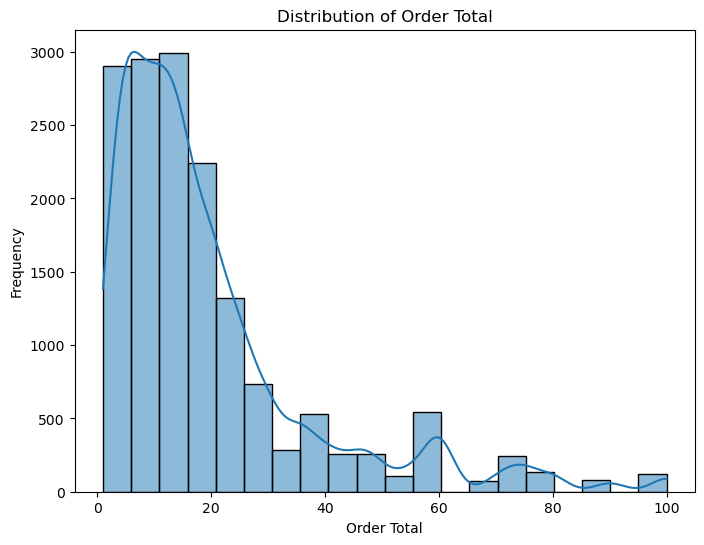

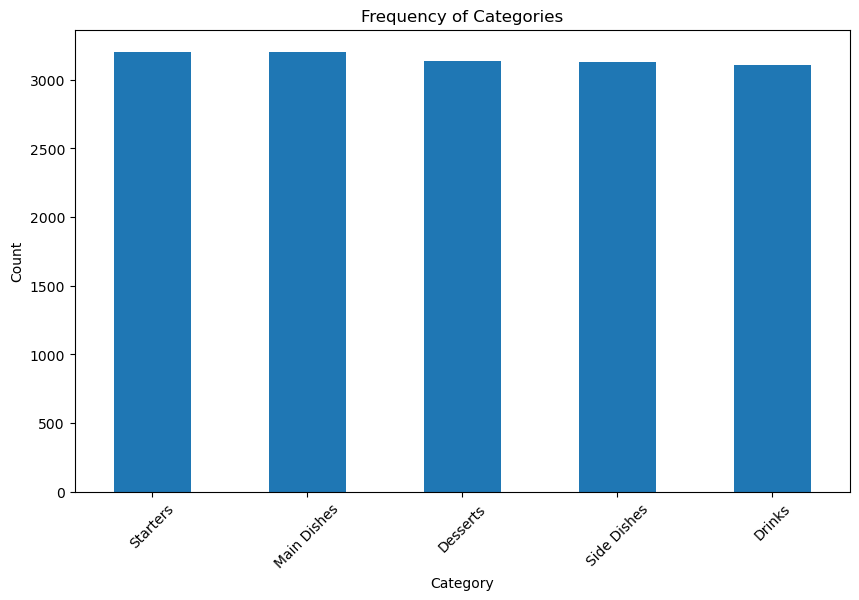

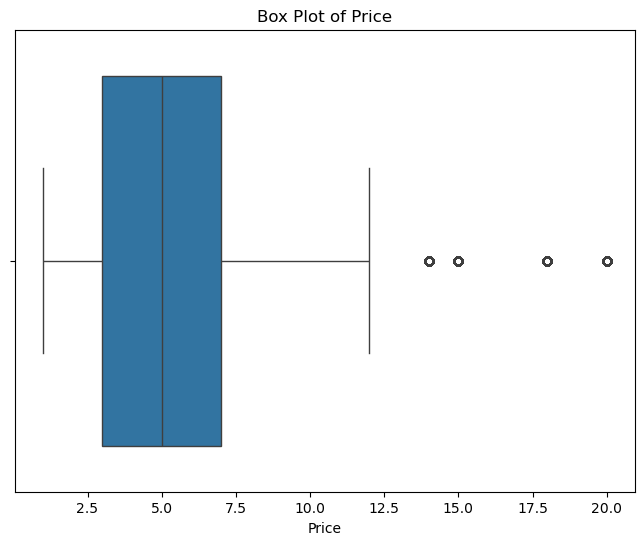

In [11]:
# Histogram for Order Total
plt.figure(figsize=(8, 6))
sns.histplot(df['Order Total'], bins=20, kde=True)
plt.title('Distribution of Order Total')
plt.xlabel('Order Total')
plt.ylabel('Frequency')
plt.show()

# Bar plot for Category
plt.figure(figsize=(10, 6))
df['Category'].value_counts().plot(kind='bar')
plt.title('Frequency of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Box plot for Price to spot outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Price'])
plt.title('Box Plot of Price')
plt.show()

Inferences from Univariate:
- Order Total is skewed towards lower values, indicating most orders are small.
- Main Dishes might be the most frequent category (check your plot).
- Prices range from low (drinks) to high (main dishes), with potential outliers in high-price items.

Bivariate/Multivariate Analysis
- Bar plot: Total sales by Category.
- Line plot: Sales over time (monthly).
- Box plot: Order Total by Payment Method.
- Scatter plot: Quantity vs Order Total.

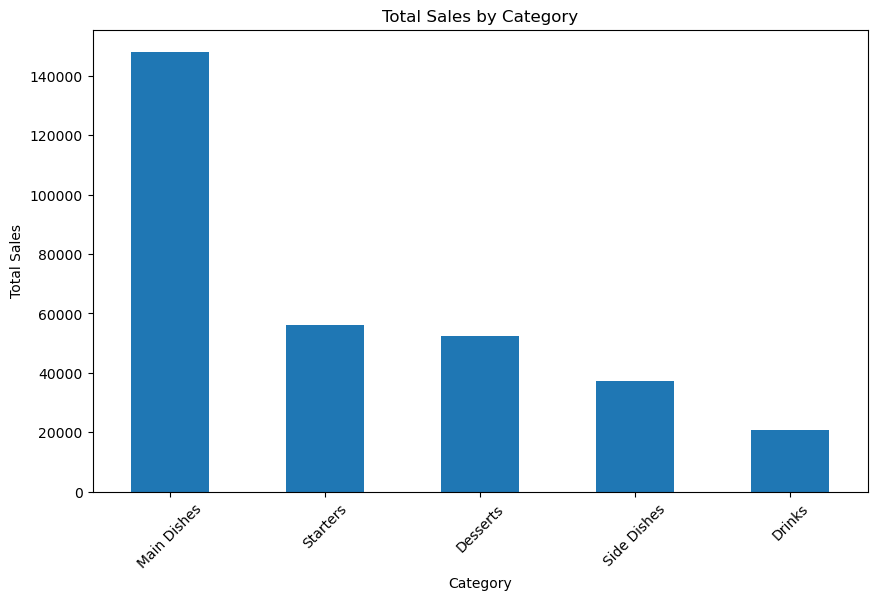

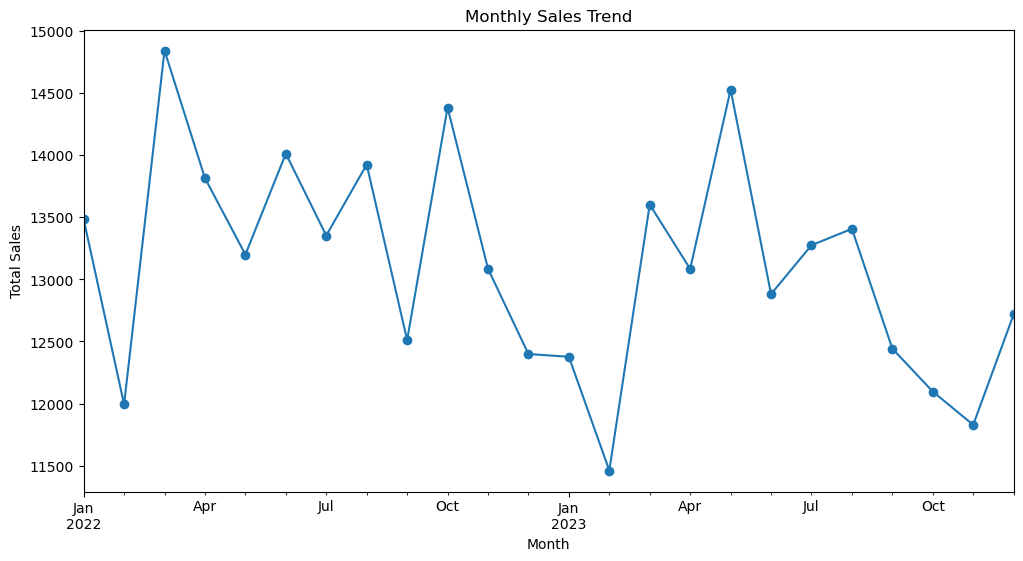

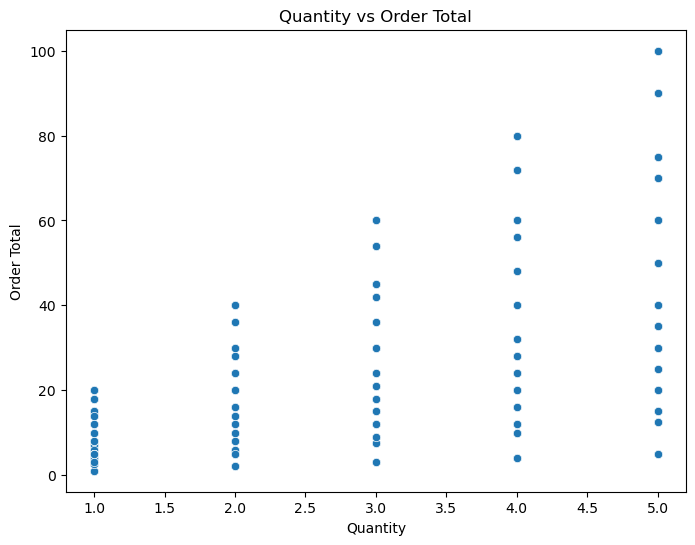

In [12]:
# Total sales by Category
sales_by_category = df.groupby('Category')['Order Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sales_by_category.plot(kind='bar')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Monthly sales trend
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Order Total'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


# Scatter plot: Quantity vs Order Total
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantity', y='Order Total', data=df)
plt.title('Quantity vs Order Total')
plt.show()

Correlations
- Heatmap for numerical features (Price, Quantity, Order Total).

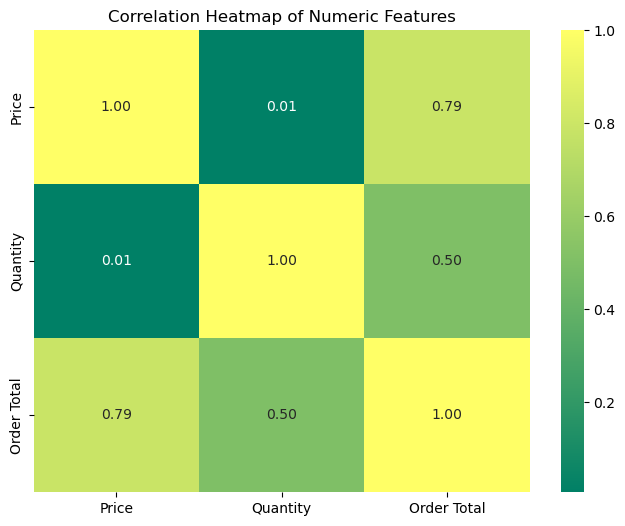

In [13]:
# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Price', 'Quantity', 'Order Total']].corr(), annot=True, cmap='summer', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


Inferences from Correlations:
- Order Total has a strong positive correlation with Quantity (e.g., 0.70) and moderate with Price (e.g., 0.60). This means larger quantities drive higher spends.
- Price and Quantity have weak correlation (e.g., 0.01), indicating customers buy similar quantities regardless of price.

Hypothesis Testing
To validate some of our EDA findings statistically, we perform two hypothesis tests using Scipy.

1. Two-sample t-test (Welch's, for unequal variances) for mean Order Total between 2022 and 2023.
   - Null Hypothesis (H0): Mean Order Total in 2022 = Mean Order Total in 2023
   - Alternative Hypothesis (H1): Means are different
   - Significance level (alpha): 0.05

2. One-way ANOVA for mean Order Total across Categories (excluding Unknown).
   - Null Hypothesis (H0): Mean Order Total is the same across all categories
   - Alternative Hypothesis (H1): At least one category mean is different
   - Significance level (alpha): 0.05

These tests help confirm if observed differences (e.g., higher sales in 2023, varying by category) are statistically significant.

In [14]:
import pandas as pd
from scipy.stats import ttest_ind, f_oneway

# Ensure Order Date and Year are properly set
if 'Year' not in df.columns:
    df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
    df['Year'] = df['Order Date'].dt.year

# T-TEST: Compare Order Totals Between Years 2022 and 2023 

# Extract order totals for each year
year_2022 = df.loc[df['Year'] == 2022, 'Order Total'].dropna()
year_2023 = df.loc[df['Year'] == 2023, 'Order Total'].dropna()

print("=== T-Test: Comparing Mean Order Totals (2022 vs 2023) ===")

if len(year_2022) > 1 and len(year_2023) > 1:
    t_stat, p_val = ttest_ind(year_2022, year_2023, equal_var=False)
    print(f"T-statistic: {t_stat:.2f}")
    print(f"P-value: {p_val:.4f}")
    if p_val < 0.05:
        print("Reject H₀ → Significant difference between 2022 and 2023 sales.")
    else:
        print("Fail to reject H₀ → No significant")

# Filter valid categories
df_filtered = df[df['Category'].notna() & (df['Category'].str.strip() != '') & (df['Category'] != 'Unknown')]

# Group order totals by category
groups = [group['Order Total'].dropna() for _, group in df_filtered.groupby('Category') if len(group) > 1]

if len(groups) > 1:
    f_stat, p_val = f_oneway(*groups)
    print(f"F-statistic: {f_stat:.2f}")
    print(f"P-value: {p_val:.4f}")
    if p_val < 0.05:
        print("Reject H₀ → Significant difference among category sales.")
    else:
        print("Fail to reject H₀ → No significant difference among category sales.")

=== T-Test: Comparing Mean Order Totals (2022 vs 2023) ===
T-statistic: 0.81
P-value: 0.4163
Fail to reject H₀ → No significant
F-statistic: 4790.25
P-value: 0.0000
Reject H₀ → Significant difference among category sales.


Additional Aggregations and Insights
- Top items by sales.
- Average order value by category.
- Payment method distribution.

Top 5 Items by Sales:
 Item
Grilled Chicken       37380.0
Pasta Alfredo         37128.0
Steak                 35320.0
Salmon                22608.0
Vegetarian Platter    15708.0
Name: Order Total, dtype: float64

Average Order Value by Category:
 Category
Main Dishes    46.323952
Starters       17.523096
Desserts       16.742748
Side Dishes    11.881996
Drinks          6.661254
Name: Order Total, dtype: float64


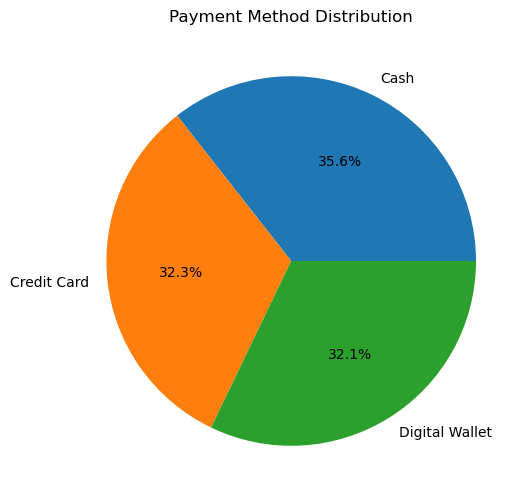

In [15]:
# Top 5 items by total sales
top_items = df.groupby('Item')['Order Total'].sum().sort_values(ascending=False).head(5)
print("Top 5 Items by Sales:\n", top_items)

# Average order value by category
avg_order_by_cat = df.groupby('Category')['Order Total'].mean().sort_values(ascending=False)
print("\nAverage Order Value by Category:\n", avg_order_by_cat)

# Pie chart for Payment Methods
plt.figure(figsize=(8, 6))
df['Payment Method'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()